In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv(r"C:\Users\Samhith\OneDrive\Documents\studies\heart.csv")

# Data Preprocessing: Outlier Removal using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 2 * IQR)) & (df[column] <= (Q3 + 2 * IQR))]

df = remove_outliers(df, "Cholesterol")
df = remove_outliers(df, "MaxHR")
df = remove_outliers(df, "RestingBP")

# Dummy Variable Creation
sex_dummies = pd.get_dummies(df["Sex"], drop_first=True)
cpt_dummies = pd.get_dummies(df["ChestPainType"], drop_first=True)
ecg_dummies = pd.get_dummies(df["RestingECG"], drop_first=True)
exercise_dummies = pd.get_dummies(df["ExerciseAngina"], drop_first=True)
st_dummies = pd.get_dummies(df["ST_Slope"], drop_first=True)

# Merge dummy variables with the original dataframe
merged = pd.concat([df.drop(["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], axis=1),
                     sex_dummies, cpt_dummies, ecg_dummies, exercise_dummies, st_dummies], axis=1)

# Feature and Target Variable Separation
X = merged.drop("HeartDisease", axis=1)
y = merged["HeartDisease"]

# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Train-Test Split with Stratified Sampling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y,random_state=42)

In [2]:
X_train.shape

(630, 15)

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

MODEL 1

In [4]:
m1=Sequential()
m1.add(Dense(input_dim=15,units=12,kernel_initializer="he_uniform",activation="relu"))
m1.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))
m1.summary()

C:\Users\Samhith\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205 (820.00 B)

 Trainable params: 205 (820.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
m1.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [6]:
es=EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True)
history1=m1.fit(X_train,y_train,batch_size=64,epochs=100,validation_split=0.33)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5646 - loss: 0.7344 - val_accuracy: 0.6010 - val_loss: 0.6956
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6181 - loss: 0.6769 - val_accuracy: 0.6154 - val_loss: 0.6642
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6483 - loss: 0.6442 - val_accuracy: 0.6587 - val_loss: 0.6356
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7001 - loss: 0.6258 - val_accuracy: 0.6923 - val_loss: 0.6102
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7181 - loss: 0.5785 - val_accuracy: 0.7308 - val_loss: 0.5875
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7572 - loss: 0.5649 - val_accuracy: 0.7260 - val_loss: 0.5671
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7606 - loss: 0.5504 - val_accuracy: 0.7452 - val_loss: 0.5488
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7821 - loss: 0.5206 - val_accuracy: 0.7404 - val_loss: 0.5325

In [7]:
y_pred=m1.predict(X_test)
y_pred=(y_pred>0.5)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[109,  15],
       [ 13, 134]], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)
acc

0.8966789667896679

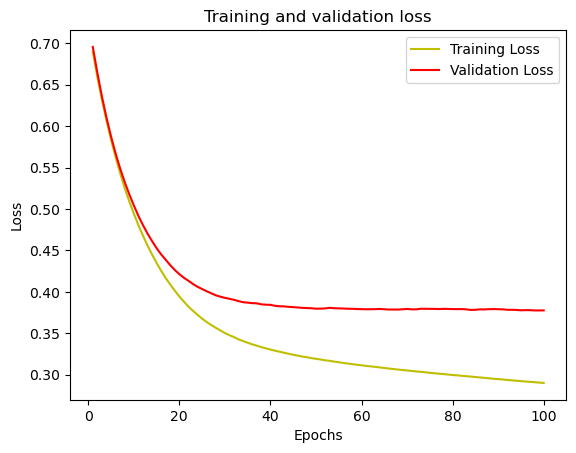

In [10]:
loss=history1.history["loss"]
val_loss=history1.history["val_loss"]
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,"y",label='Training Loss')
plt.plot(epochs,val_loss,"r", label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

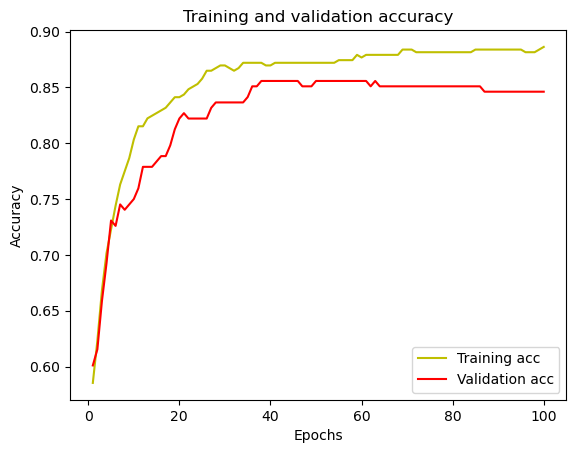

In [11]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model2

Epoch 1/500


C:\Users\Samhith\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4978 - loss: 1.2932 - val_accuracy: 0.5952 - val_loss: 1.0307
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5093 - loss: 1.2166 - val_accuracy: 0.5952 - val_loss: 0.9840
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5369 - loss: 1.0959 - val_accuracy: 0.5873 - val_loss: 0.9408
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5131 - loss: 1.1096 - val_accuracy: 0.5873 - val_loss: 0.9005
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5238 - loss: 0.9849 - val_accuracy: 0.5952 - val_loss: 0.8641
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5254 - loss: 0.9539 - val_accuracy: 0.6032 - val_loss: 0.8308
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5079 - loss: 0.9436 - val_accuracy: 0.5794 - val_loss: 0.8003
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5444 - loss: 0.8521 - val_accuracy: 0.5794 - val_loss: 0.7732
Epoch 9/

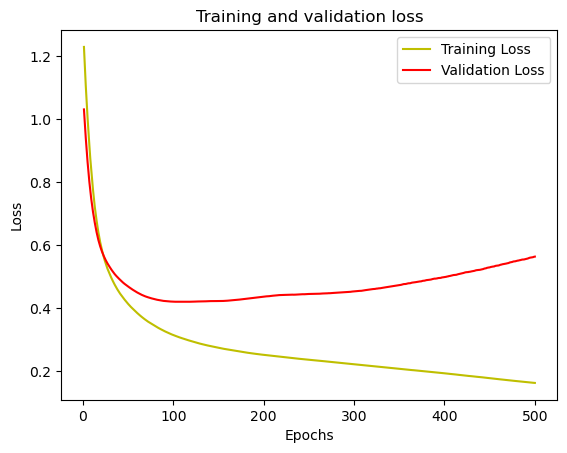

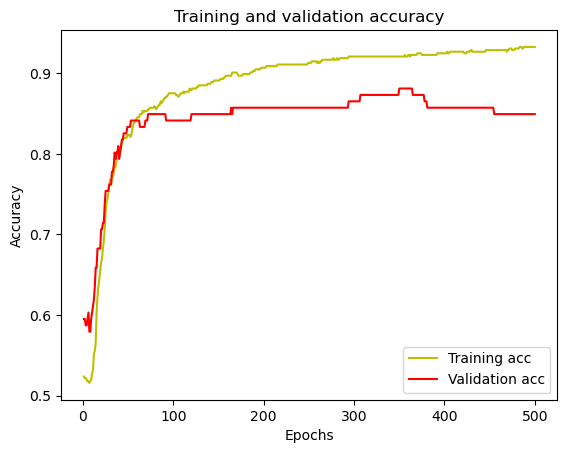

In [30]:
m2=Sequential([
    Dense(12,activation="relu",input_dim=15,kernel_initializer="he_uniform"),
    Dense(6,activation="relu",kernel_initializer="he_uniform"),
    Dense(1,activation="sigmoid",kernel_initializer="glorot_uniform")
])
m2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history2= m2.fit(X_train, y_train, epochs=500, batch_size=128, validation_split=0.2, verbose=1)
loss=history2.history["loss"]
val_loss=history2.history["val_loss"]
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,"y",label='Training Loss')
plt.plot(epochs,val_loss,"r", label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
test_loss, test_accuracy = m2.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate Classification Report
y_pred = (m2.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.8842 - loss: 0.3319
Test Accuracy: 0.87
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       122
           1       0.88      0.87      0.88       149

    accuracy                           0.87       271
   macro avg       0.87      0.87      0.87       271
weighted avg       0.87      0.87      0.87       271



In [32]:
m3 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1],kernel_initializer="he_uniform"),
    Dropout(0.4),
    Dense(32, activation='relu',kernel_initializer="he_uniform"),
    Dropout(0.4),
    Dense(16, activation='relu',kernel_initializer="he_uniform"),
    Dropout(0.4),
    Dense(1, activation='sigmoid',kernel_initializer="glorot_uniform")  # Output layer for binary classification
])

C:\Users\Samhith\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
m3.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history3= m3.fit(X_train, y_train, epochs=500, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7099 - loss: 0.5510 - val_accuracy: 0.8492 - val_loss: 0.4847
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7121 - loss: 0.5674 - val_accuracy: 0.8492 - val_loss: 0.4872
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6973 - loss: 0.5836 - val_accuracy: 0.8492 - val_loss: 0.4883
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6795 - loss: 0.5950 - val_accuracy: 0.8492 - val_loss: 0.4907
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7036 - loss: 0.5678 - val_accuracy: 0.8492 - val_loss: 0.4911
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7167 - loss: 0.5567 - val_accuracy: 0.8492 - val_loss: 0.4897
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7010 - loss: 0.5829 - val_accuracy: 0.8492 - val_loss: 0.4888
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7156 - loss: 0.5526 - val_accuracy: 0.8492 - val_loss: 0.487

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8872 - loss: 0.4685 
Test Accuracy: 0.89
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       122
           1       0.93      0.86      0.89       149

    accuracy                           0.89       271
   macro avg       0.88      0.89      0.89       271
weighted avg       0.89      0.89      0.89       271



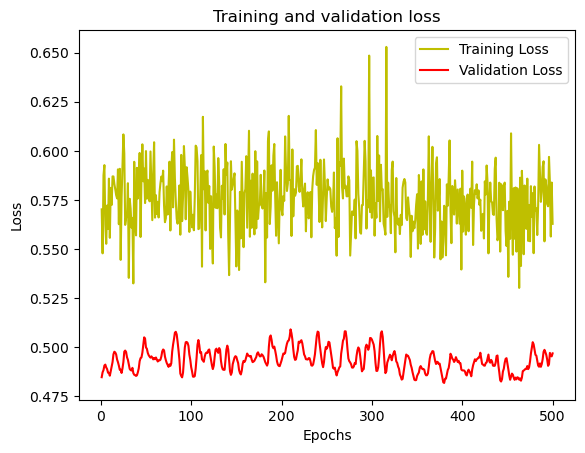

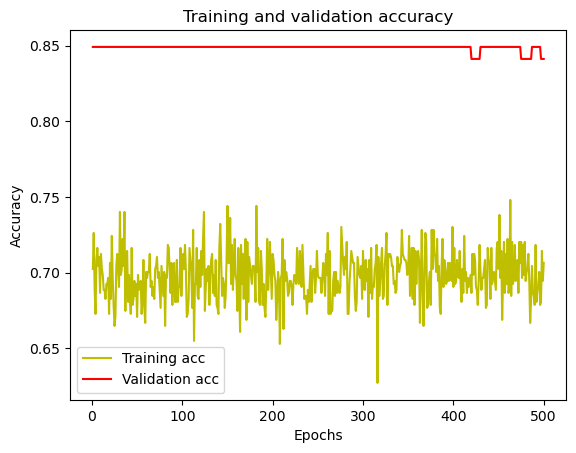

In [46]:
test_loss, test_accuracy = m3.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate Classification Report
y_pred = (m3.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

loss=history3.history["loss"]
val_loss=history3.history["val_loss"]
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,"y",label='Training Loss')
plt.plot(epochs,val_loss,"r", label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()